In [33]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv(r"sonar.all-data.csv")
df 

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
df.shape

(207, 61)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [5]:
df['R']

0      R
1      R
2      R
3      R
4      R
      ..
202    M
203    M
204    M
205    M
206    M
Name: R, Length: 207, dtype: object

In [6]:
df.rename(columns={'R':"target"},inplace=True)

In [7]:
df["target"].value_counts()
# M = Mines 
# R = Rocks

M    111
R     96
Name: target, dtype: int64

In [8]:
df.groupby(["target"]).describe()

0.0200                                                                \
        count      mean       std     min      25%     50%      75%     max   
target                                                                        
M       111.0  0.034989  0.027074  0.0015  0.01795  0.0269  0.04185  0.1371   
R        96.0  0.022524  0.014762  0.0025  0.01220  0.0201  0.02915  0.0856   

       0.0371            ...    0.0090         0.0032                      \
        count      mean  ...       75%     max  count      mean       std   
target                   ...                                                
M       111.0  0.045544  ...  0.011350  0.0364  111.0  0.006930  0.005958   
R        96.0  0.030232  ...  0.008675  0.0294   96.0  0.006053  0.003677   

                                                 
           min     25%      50%     75%     max  
target                                           
M       0.0006  0.0031  0.00530  0.0092  0.0439  
R       0.0011  0.0030  0.00545  0.0078  0.0180  

[2 rows x 480 columns]

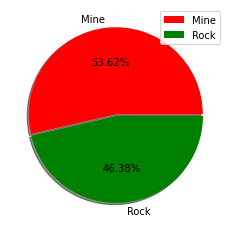

In [9]:
Mine = df["target"][df["target"] == 'M'].count()
Rock = df["target"][df["target"] == 'R'].count()
plt.pie([Mine, Rock], labels=['Mine', 'Rock'], autopct='%.2f%%',explode=[0.01,0.01],shadow=True,  colors=['red', 'Green'])
plt.legend()
plt.show()

In [10]:
df['target']

0      R
1      R
2      R
3      R
4      R
      ..
202    M
203    M
204    M
205    M
206    M
Name: target, Length: 207, dtype: object

In [11]:
df.target = df.target.apply(lambda x: 1 if x == 'M' else 0)


In [12]:
df['target']
#R= 0 
#M=1

0      0
1      0
2      0
3      0
4      0
      ..
202    1
203    1
204    1
205    1
206    1
Name: target, Length: 207, dtype: int64

In [13]:
df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,target
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523,0.536232
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038,0.499894
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100,0.000000
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300,1.000000
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [14]:
y = df.target

In [15]:
x = df.drop('target',axis=1)

In [16]:
x 

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [17]:
y 
#R=0 
#M=1

0      0
1      0
2      0
3      0
4      0
      ..
202    1
203    1
204    1
205    1
206    1
Name: target, Length: 207, dtype: int64

In [18]:
X_train , X_test , y_train , y_test = train_test_split(x,y,train_size=0.8)

In [19]:
print("number of train rows=",len(X_train))
print("number of test rows=",len(X_test))

number of train rows= 165
number of test rows= 42


In [29]:
def kfolds(model, model_name):
    model = cross_val_score(model, x,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def f1(model, model_name):
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average=None)
    print(f"F1 score of {model_name} Class 0: {f1[0] * 100}%")
    print(f"F1 score of {model_name} Class 1: {f1[1] * 100}%")
    
def percision(model, model_name):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average=None)
    print(f"Percision score of {model_name} Class 0: {precision[0] * 100}%")
    print(f"Percision score of {model_name} Class 1: {precision[1] * 100}%")

In [30]:
#logistic regression
lr_model = LogisticRegression()
kfolds(lr_model, "Logistic Regression")
train(lr_model, "Logistic Regression")
f1(lr_model, "Logistic Regression")
percision(lr_model, "Logistic Regression")

Logistic Regression score on cross validation: 64.83333333333333%
Logistic Regression model score on Training data: 83.63636363636363%
Logistic Regression model score on Testing data: 80.95238095238095%
F1 score of Logistic Regression Class 0: 80.95238095238095%
F1 score of Logistic Regression Class 1: 80.95238095238095%
Percision score of Logistic Regression Class 0: 73.91304347826086%
Percision score of Logistic Regression Class 1: 89.47368421052632%


In [31]:
# random forrest
rf_model = RandomForestClassifier()
kfolds(rf_model, "Random Forest")
train(rf_model, "Random Forest")
f1(rf_model, "Random Forest")
percision(rf_model, "Random Forest")

Random Forest score on cross validation: 71.5952380952381%
Random Forest model score on Training data: 100.0%
Random Forest model score on Testing data: 83.33333333333334%
F1 score of Random Forest Class 0: 82.92682926829269%
F1 score of Random Forest Class 1: 83.72093023255815%
Percision score of Random Forest Class 0: 77.27272727272727%
Percision score of Random Forest Class 1: 90.0%


In [34]:
#KNN
knn_model = KNeighborsClassifier()
kfolds(knn_model, "KNN")
train(knn_model, "KNN")
f1(knn_model, "KNN")
percision(knn_model, "KNN")

KNN score on cross validation: 59.30952380952381%
KNN model score on Training data: 86.66666666666667%
KNN model score on Testing data: 85.71428571428571%
F1 score of KNN Class 0: 84.21052631578947%
F1 score of KNN Class 1: 86.95652173913044%
Percision score of KNN Class 0: 84.21052631578947%
Percision score of KNN Class 1: 86.95652173913044%


In [35]:
#bagging
bagg_model = BaggingClassifier()
kfolds(bagg_model, "Bagging")
train(bagg_model, "Bagging")
f1(bagg_model, "Bagging")
percision(bagg_model, "Bagging")

Bagging score on cross validation: 64.95238095238095%
Bagging model score on Training data: 100.0%
Bagging model score on Testing data: 85.71428571428571%
F1 score of Bagging Class 0: 85.71428571428571%
F1 score of Bagging Class 1: 85.71428571428571%
Percision score of Bagging Class 0: 78.26086956521739%
Percision score of Bagging Class 1: 94.73684210526315%


In [36]:
#gradient boost
gb_model = GradientBoostingClassifier()
kfolds(gb_model, "Boosting")
train(gb_model, "Boosting")
f1(gb_model, "Boosting")
percision(gb_model, "Boosting")

Boosting score on cross validation: 70.14285714285715%
Boosting model score on Training data: 100.0%
Boosting model score on Testing data: 83.33333333333334%
F1 score of Boosting Class 0: 82.92682926829269%
F1 score of Boosting Class 1: 83.72093023255815%
Percision score of Boosting Class 0: 77.27272727272727%
Percision score of Boosting Class 1: 90.0%


In [37]:
#decision tree
dt_model = DecisionTreeClassifier()
kfolds(dt_model, "Decision Tree")
train(dt_model, "Decision Tree")
f1(dt_model, "Decision Tree")
percision(dt_model, "Decision Tree")

Decision Tree score on cross validation: 61.00000000000001%
Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 78.57142857142857%
F1 score of Decision Tree Class 0: 78.04878048780488%
F1 score of Decision Tree Class 1: 79.06976744186046%
Percision score of Decision Tree Class 0: 72.72727272727273%
Percision score of Decision Tree Class 1: 85.0%


In [38]:
#SVM
svm_model = SVC()
kfolds(svm_model, "SVM")
train(svm_model, "SVM")
f1(svm_model, "SVM")
percision(svm_model, "SVM")

SVM score on cross validation: 64.33333333333333%
SVM model score on Training data: 87.27272727272727%
SVM model score on Testing data: 83.33333333333334%
F1 score of SVM Class 0: 80.0%
F1 score of SVM Class 1: 85.71428571428572%
Percision score of SVM Class 0: 87.5%
Percision score of SVM Class 1: 80.76923076923077%


In [39]:
#we can use bagging model and SVM for this dstaset 